In [1]:
!pythion --version

/bin/bash: line 1: pythion: command not found


In [2]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
img1 = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/pentagon.bmp')
img2 = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/milkdrop.bmp')
RGB_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
RGB_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [7]:
output_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

In [8]:
R_img1,G_img1,B_img1 = cv2.split(RGB_img1)
R_img2,G_img2,B_img2 = cv2.split(RGB_img2)

In [9]:
R_plus=np.zeros((RGB_img1.shape[0], RGB_img1.shape[1]),dtype=np.ubyte)
G_plus=np.zeros((RGB_img1.shape[0], RGB_img1.shape[1]),dtype=np.ubyte)
B_plus=np.zeros((RGB_img1.shape[0], RGB_img1.shape[1]),dtype=np.ubyte)

In [10]:
def saturation(value):
  if(value>255):
    value = 255;
  return value;
W=0.4

In [11]:
for h in range(RGB_img1.shape[0]):
  for w in range(RGB_img1.shape[1]):
    R_plus[h,w]=saturation(np.fabs(W*np.float32(R_img1[h,w])+(1-W)*np.float32(R_img2[h,w])))
    G_plus[h,w]=saturation(np.fabs(W*np.float32(G_img1[h,w])+(1-W)*np.float32(G_img2[h,w])))
    B_plus[h,w]=saturation(np.fabs(W*np.float32(B_img1[h,w])+(1-W)*np.float32(B_img2[h,w])))

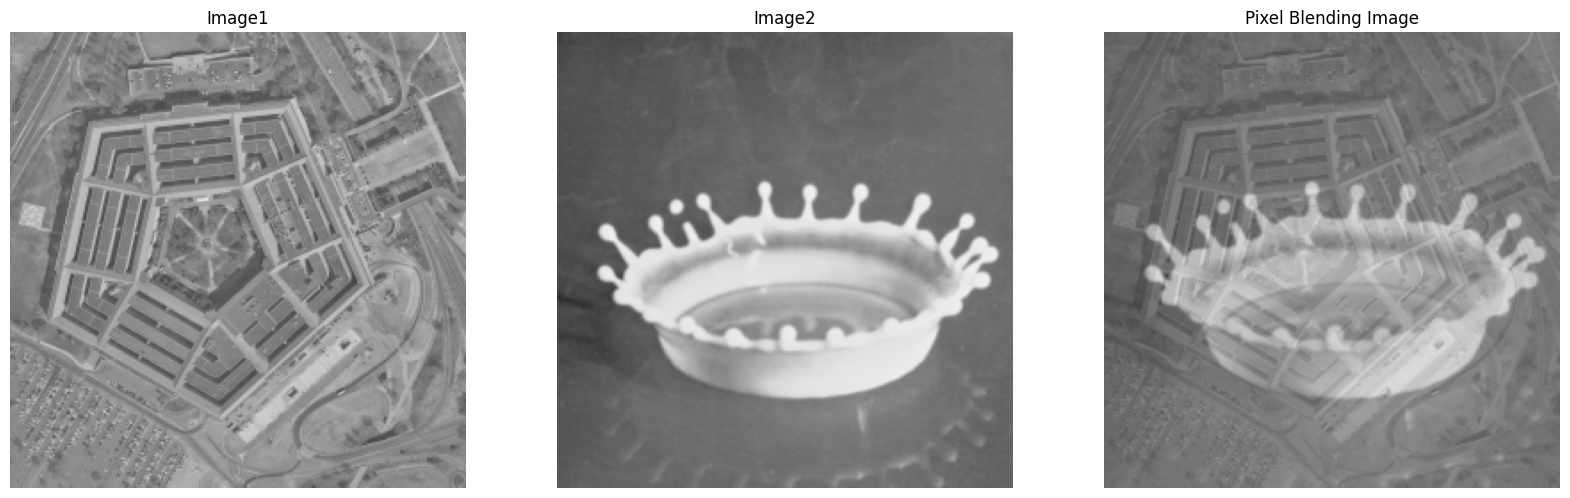

In [13]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title("Image1")
plt.imshow(RGB_img1)
plt.axis("off")
plt.subplot(1,3,2)
plt.title("Image2")
plt.imshow(RGB_img2)
plt.axis("off")
plt.subplot(1,3,3)
output_img[:,:,0]=R_plus
output_img[:,:,1]=G_plus
output_img[:,:,2]=B_plus
plt.title("Pixel Blending Image")
plt.imshow(output_img)
plt.axis("off")
plt.show()